In [26]:
import requests
import os

r = requests.get("https://github.com/adambard/learnxinyminutes-docs")
r.status_code
# r.text
# print (r.text)

200

In [27]:

os.getcwd()
with open("learningxinyminutes.html", "wb") as f:
    f.write(r.text.encode("UTF-8"))
    
fp = "https://raw.githubusercontent.com/adambard/learnxinyminutes-docs/master/"
fn = "pets.csv"
r = requests.get(fp + fn)
print(r.text)
with open(fn,"wb") as f:
    f.write(r.text.encode("UTF-8"))
    

name,age,weight,species
"fluffy",3,14,"cat"
"vesuvius",6,23,"fish"
"rex",5,34,"dog"



In [28]:
import pandas as pd
import numpy as np
import scipy as sp

pets = pd.read_csv(fn)
pets

,name,age,weight,species
0,fluffy,3,14,cat
1,vesuvius,6,23,fish
2,rex,5,34,dog


In [29]:
pets.age

0    3
1    6
2    5
Name: age, dtype: int64

In [30]:
pets["age"]

0    3
1    6
2    5
Name: age, dtype: int64

In [31]:
pets.head(2)

,name,age,weight,species
0,fluffy,3,14,cat
1,vesuvius,6,23,fish


In [32]:
pets.tail(2)

,name,age,weight,species
1,vesuvius,6,23,fish
2,rex,5,34,dog


In [33]:
      pets.name[1]                                                                                                                                              

'vesuvius'

In [34]:
pets.age[0:2]

0    3
1    6
Name: age, dtype: int64

In [35]:
sum(pets.age)

14

In [36]:
max(pets.weight) - min (pets.weight)

20

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([3. , 3.3, 3.6, 3.9, 4.2, 4.5, 4.8, 5.1, 5.4, 5.7, 6. ]),
 <a list of 10 Patch objects>)

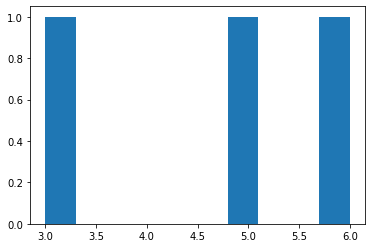

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(pets.age)


{'whiskers': [<matplotlib.lines.Line2D at 0x239797e6af0>,
 'caps': [<matplotlib.lines.Line2D at 0x239797f01f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x239797e6790>],
 'medians': [<matplotlib.lines.Line2D at 0x239797f08b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x239797f0bb0>],
 'means': []}

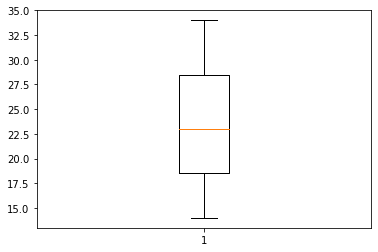

In [38]:
plt.boxplot(pets.weight)


Text(0, 0.5, 'weight')

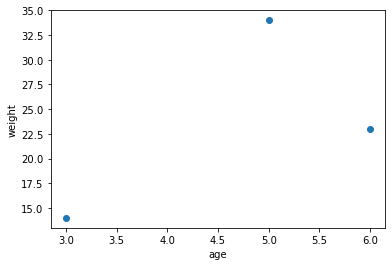

In [39]:
plt.scatter(pets.age, pets.weight)
plt.xlabel("age")
plt.ylabel("weight")

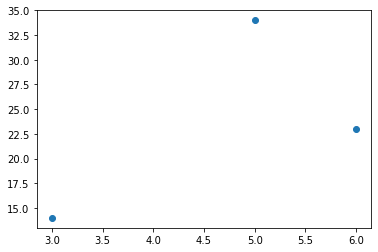

In [40]:
import seaborn as sns
plt.scatter(pets.age, pets.weight)

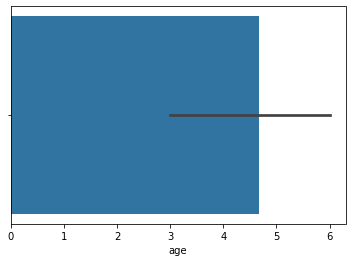

In [41]:
sns.barplot(pets["age"])

In [42]:
from ggplot import *
ggplot(aes(x="age", y="weight"), data=pets) + geom_point() +labs(tilte="pets")

AttributeError: module 'pandas' has no attribute 'tslib'

In [65]:
url = "https://raw.githubusercontent.com/adambard/learnxinyminutes-docs/master/hre.csv"
r = requests.get(url)
r.status_code
fp = "hre.csv"
with open(fp, "wb") as f:
    f.write(r.text.encode("UTF-8"))

hre = pd.read_csv(fp)
hre.head()

,Ix,Dynasty,Name,Birth,Death,Coronation 1,Coronation 2,Ceased to be Emperor
0,NaN,Carolingian,Charles I,2 April 742,28 January 814,25 December 800,NaN,28 January 814
1,NaN,Carolingian,Louis I,778,20 June 840,11 September 813,5 October 816,20 June 840
2,NaN,Carolingian,Lothair I,795,29 September 855,5 April 823,NaN,29 September 855
3,NaN,Carolingian,Louis II,825,12 August 875,15 June 844,18 May 872,12 August 875
4,NaN,Carolingian,Charles II,13 June 823,6 October 877,29 December 875,NaN,6 October 877


In [66]:
import re #reqular expressions
rx = re.compile(r'\d+$') # match trailing digits

In [71]:
from functools import reduce

def extractYear(v):
    return(pd.Series(reduce(lambda x, y: x+y, map(rx.findall,v), [])).astype(int))

hre["BirthY"] = extractYear(hre.Birth)
hre["DeathY"] = extractYear(hre.Death)
hre["EstAge"] = hre.DeathY - hre.BirthY
hre.BirthY
hre.DeathY
hre.EstAge

0     72
1     62
2     60
3     50
4     54
5     49
6     59
7     18
8     49
9     48
10    79
11    61
12    28
13    22
14    51
15    49
16    39
17    56
18    39
19    62
20    68
21    32
22    43
23    56
24    38
25    65
26    62
27    69
28    78
29    60
30    58
31    61
32    49
33    60
34    62
35    59
36    49
37    65
38    33
39    55
40    48
41    57
42    49
43    45
44    67
Name: EstAge, dtype: int32

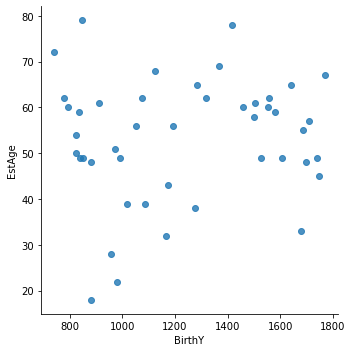

In [81]:
sns.lmplot("BirthY", "EstAge", data=hre, hue=None, fit_reg=False)

In [78]:
from scipy import stats
(slope, intercept, r, pval, stderr) = stats.linregress(hre.BirthY, hre.EstAge)


0.49032107445388495

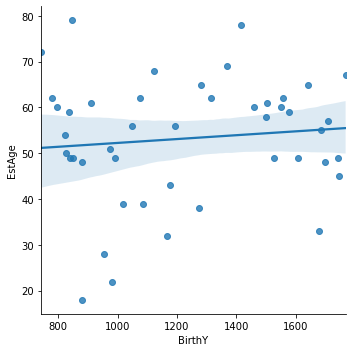

In [79]:
sns.lmplot("BirthY", "EstAge", data=hre)